/tmp/ipykernel_17519/941507356.py:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  merged_data['Date'] = pd.to_datetime(merged_data['Date'], infer_datetime_format=True)


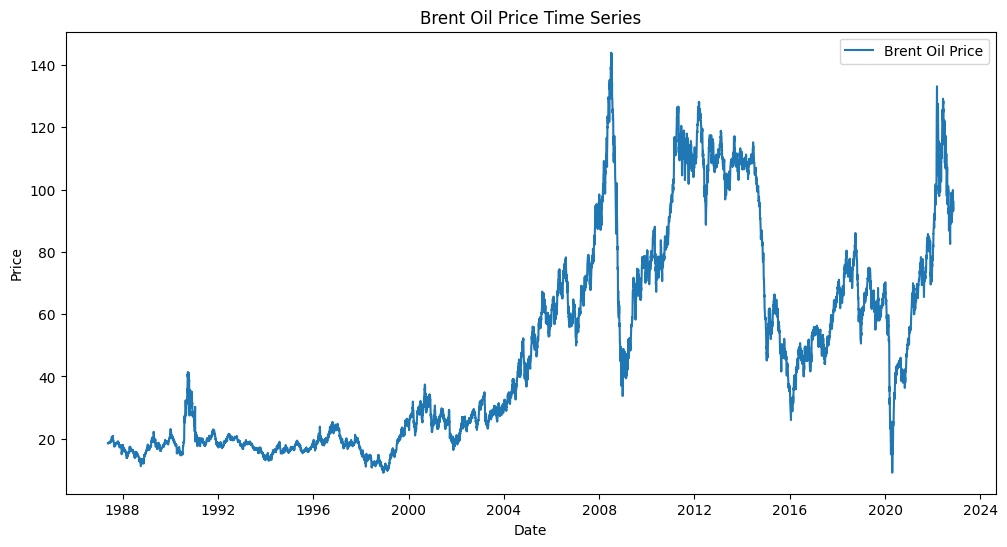

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model

# Load the merged data
merged_data = pd.read_csv('../scripts/merged_data.csv')

# Convert 'Date' column to datetime format
merged_data['Date'] = pd.to_datetime(merged_data['Date'], infer_datetime_format=True)

# Set 'Date' as the index
merged_data.set_index('Date', inplace=True)

# Plot the Brent Oil Prices data to visualize the trend
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Brent Oil Price Time Series')
plt.legend()
plt.show()


ADF Statistic: -1.989811008729487
p-value: 0.2910584089859408


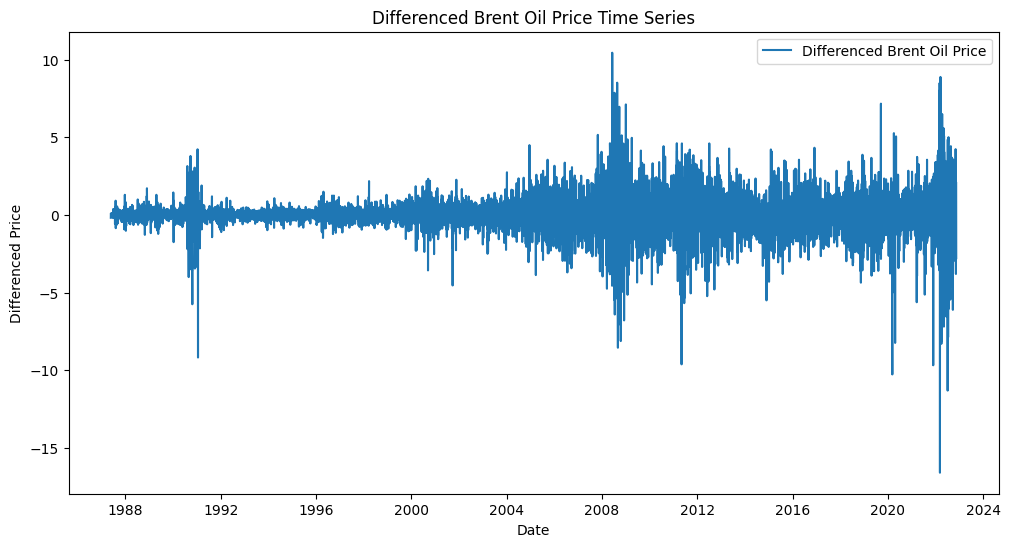

/home/enat/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/home/enat/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


AIC: 29645.2993414875
BIC: 29666.699071452276


In [4]:
# Determine the order of ARIMA model (p, d, q)
# Perform ADF test to check for stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(merged_data['Price'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p-value > 0.05, data is non-stationary and we need to difference the data
# Differencing the data
price_diff = merged_data['Price'].diff().dropna()

# Plot differenced data to visualize
plt.figure(figsize=(12, 6))
plt.plot(price_diff, label='Differenced Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.title('Differenced Brent Oil Price Time Series')
plt.legend()
plt.show()

# Determine the order of ARIMA model using AIC and BIC
model = sm.tsa.statespace.SARIMAX(merged_data['Price'], order=(1, 1, 1))
results = model.fit()
print(f'AIC: {results.aic}')
print(f'BIC: {results.bic}')


In [ ]:
# Fit the ARIMA model
model = ARIMA(merged_data['Price'], order=(1, 1, 1))
results = model.fit()

# Print summary of the model
print(results.summary())

# Plot the residuals to check for any patterns
plt.figure(figsize=(12, 6))
plt.plot(results.resid, label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of ARIMA Model')
plt.legend()
plt.show()

# Calculate RMSE
rmse = np.sqrt(np.mean(results.resid ** 2))
print(f'RMSE: {rmse}')


In [ ]:
# Fit the GARCH model
garch_model = arch_model(results.resid, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()

# Print summary of the model
print(garch_results.summary())

# Plot the conditional volatility
plt.figure(figsize=(12, 6))
plt.plot(garch_results.conditional_volatility, label='Conditional Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Conditional Volatility from GARCH Model')
plt.legend()
plt.show()


In [ ]:
# Fit the GARCH model to the residuals of the ARIMA model
garch_model = arch_model(results.resid, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()

# Print summary of the model
print(garch_results.summary())

# Calculate AIC and BIC for GARCH model
print(f'AIC: {garch_results.aic}')
print(f'BIC: {garch_results.bic}')
